In [1]:
import finnhub
import pandas as pd
from textblob import TextBlob
from datetime import datetime, timedelta

# Setup client
finnhub_client = finnhub.Client(api_key='co40o9pr01qqksebf1n0co40o9pr01qqksebf1ng')

res = finnhub_client.company_news('AAPL', _from="2024-03-01", to="2024-03-31")
df= pd.DataFrame(res)

#df['headline_sentiment'] = df['headline'].apply(lambda x:TextBlob(x).sentiment.polarity)
#df['summary_sentiment'] = df['summary'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [45]:
# Initial start date
start_date = '2023-04-01'
start_date_obj = datetime.strptime(start_date, '%Y-%m-%d')
 
# Loop for one year
for _ in range(73):
    
    start_date_obj += timedelta(days=1)
    start_date_new = start_date_obj.strftime('%Y-%m-%d')
    
    print('Start Date :', start_date_new)
   
    start_date_obj += timedelta(days=4)
    
    end_date = start_date_obj.strftime('%Y-%m-%d')
    print('End Date:', end_date)
    finnhub_client = finnhub.Client(api_key='co40o9pr01qqksebf1n0co40o9pr01qqksebf1ng')
    res = finnhub_client.company_news('AAPL', _from=start_date_new, to=end_date)
    df1 = pd.DataFrame(res)
    df = pd.concat([df, df1])

Start Date : 2023-04-02
End Date: 2023-04-06
Start Date : 2023-04-07
End Date: 2023-04-11
Start Date : 2023-04-12
End Date: 2023-04-16
Start Date : 2023-04-17
End Date: 2023-04-21
Start Date : 2023-04-22
End Date: 2023-04-26
Start Date : 2023-04-27
End Date: 2023-05-01
Start Date : 2023-05-02
End Date: 2023-05-06
Start Date : 2023-05-07
End Date: 2023-05-11
Start Date : 2023-05-12
End Date: 2023-05-16
Start Date : 2023-05-17
End Date: 2023-05-21
Start Date : 2023-05-22
End Date: 2023-05-26
Start Date : 2023-05-27
End Date: 2023-05-31
Start Date : 2023-06-01
End Date: 2023-06-05
Start Date : 2023-06-06
End Date: 2023-06-10
Start Date : 2023-06-11
End Date: 2023-06-15
Start Date : 2023-06-16
End Date: 2023-06-20
Start Date : 2023-06-21
End Date: 2023-06-25
Start Date : 2023-06-26
End Date: 2023-06-30
Start Date : 2023-07-01
End Date: 2023-07-05
Start Date : 2023-07-06
End Date: 2023-07-10
Start Date : 2023-07-11
End Date: 2023-07-15
Start Date : 2023-07-16
End Date: 2023-07-20
Start Date

In [46]:
df.head()

,category,datetime,headline,id,image,related,source,summary,url
0,company,1711886400,Spring Cleaning: 3 Stocks to Say Goodbye to Ri...,126767363,https://g.foolcdn.com/editorial/images/770708/...,AAPL,Yahoo,Investors might want to move on from these sto...,https://finnhub.io/api/news?id=ab100111551ca98...
1,company,1711882800,Berkshire Hathaway: Getting Harder For Buffett...,126767743,https://static.seekingalpha.com/cdn/s3/uploads...,AAPL,SeekingAlpha,Berkshire Hathaway stock has recovered with th...,https://finnhub.io/api/news?id=ebb9e96a3b3f6b9...
2,company,1711879140,Here's How Much Dividend Income You'd Make by ...,126767564,https://g.foolcdn.com/editorial/images/770999/...,AAPL,Yahoo,Income investors won't find these seven stocks...,https://finnhub.io/api/news?id=d8dda6a94bf0a83...
3,company,1711877400,Monthly Options Series: Earn A Potentially Con...,126767375,https://static.seekingalpha.com/cdn/s3/uploads...,AAPL,SeekingAlpha,"In this monthly series, we present how to sele...",https://finnhub.io/api/news?id=7afefe36a217976...
4,company,1711876800,Is It Safe to Buy Stocks With the S&P 500 at a...,126767565,https://g.foolcdn.com/editorial/images/770852/...,AAPL,Yahoo,Certain Wall Street analysts see substantial d...,https://finnhub.io/api/news?id=d07d0a2e7a93bda...


In [47]:
df['headline_sentiment'] = df['headline'].apply(lambda x:TextBlob(x).sentiment.polarity)
df['summary_sentiment'] = df['summary'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [48]:
df["date"] = pd.to_datetime(df["datetime"], unit="s").dt.date
dff = df[['date','summary_sentiment']].groupby(['date']).mean()
dff.head() 

,summary_sentiment
date,
2022-12-01,0.241667
2023-01-30,1.000000
2023-02-02,0.095000
2023-04-06,0.120116
2023-04-07,0.156203


In [50]:
df.head()

,category,datetime,headline,id,image,related,source,summary,url,headline_sentiment,summary_sentiment,date
0,company,1711886400,Spring Cleaning: 3 Stocks to Say Goodbye to Ri...,126767363,https://g.foolcdn.com/editorial/images/770708/...,AAPL,Yahoo,Investors might want to move on from these sto...,https://finnhub.io/api/news?id=ab100111551ca98...,0.392857,0.000000,2024-03-31
1,company,1711882800,Berkshire Hathaway: Getting Harder For Buffett...,126767743,https://static.seekingalpha.com/cdn/s3/uploads...,AAPL,SeekingAlpha,Berkshire Hathaway stock has recovered with th...,https://finnhub.io/api/news?id=ebb9e96a3b3f6b9...,-0.100000,-0.018750,2024-03-31
2,company,1711879140,Here's How Much Dividend Income You'd Make by ...,126767564,https://g.foolcdn.com/editorial/images/770999/...,AAPL,Yahoo,Income investors won't find these seven stocks...,https://finnhub.io/api/news?id=d8dda6a94bf0a83...,0.600000,1.000000,2024-03-31
3,company,1711877400,Monthly Options Series: Earn A Potentially Con...,126767375,https://static.seekingalpha.com/cdn/s3/uploads...,AAPL,SeekingAlpha,"In this monthly series, we present how to sele...",https://finnhub.io/api/news?id=7afefe36a217976...,0.250000,0.295238,2024-03-31
4,company,1711876800,Is It Safe to Buy Stocks With the S&P 500 at a...,126767565,https://g.foolcdn.com/editorial/images/770852/...,AAPL,Yahoo,Certain Wall Street analysts see substantial d...,https://finnhub.io/api/news?id=d07d0a2e7a93bda...,0.330000,0.214286,2024-03-31


In [52]:
df.count()

category              14925
datetime              14925
headline              14925
id                    14925
image                 14925
related               14925
source                14925
summary               14925
url                   14925
headline_sentiment    14925
summary_sentiment     14925
date                  14925
dtype: int64

In [54]:
import yfinance as yf
 
# Define the stock symbol (AAPL for Apple Inc.)
symbol = 'AAPL'
 
# Fetch stock data from Yahoo Finance
data = yf.download(symbol, start='2023-04-01', end='2024-03-31')
    
   

[*********************100%%**********************]  1 of 1 completed


In [55]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750641,46278300
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,161.169739,47716900


In [56]:
data.reset_index(inplace=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   Open       249 non-null    float64       
 2   High       249 non-null    float64       
 3   Low        249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Volume     249 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14925 entries, 0 to 169
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            14925 non-null  object 
 1   datetime            14925 non-null  int64  
 2   headline            14925 non-null  object 
 3   id                  14925 non-null  int64  
 4   image               14925 non-null  object 
 5   related             14925 non-null  object 
 6   source              14925 non-null  object 
 7   summary             14925 non-null  object 
 8   url                 14925 non-null  object 
 9   headline_sentiment  14925 non-null  float64
 10  summary_sentiment   14925 non-null  float64
 11  date                14925 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.5+ MB


In [59]:
df['Date'] = pd.to_datetime(df['date'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14925 entries, 0 to 169
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   category            14925 non-null  object        
 1   datetime            14925 non-null  int64         
 2   headline            14925 non-null  object        
 3   id                  14925 non-null  int64         
 4   image               14925 non-null  object        
 5   related             14925 non-null  object        
 6   source              14925 non-null  object        
 7   summary             14925 non-null  object        
 8   url                 14925 non-null  object        
 9   headline_sentiment  14925 non-null  float64       
 10  summary_sentiment   14925 non-null  float64       
 11  date                14925 non-null  object        
 12  Date                14925 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)

In [61]:
merged_df = pd.merge(data, df, on = 'Date', how = 'left' )

In [62]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,category,datetime,headline,id,image,related,source,summary,url,headline_sentiment,summary_sentiment,date
0,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750641,46278300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100,company,1.680814e+09,U.S. lawmakers set to meet with CEOs over Chin...,119661615.0,https://s.yimg.com/ny/api/res/1.2/Yaa9MBYrK38G...,AAPL,Yahoo,Yahoo Finance's Rick Newman details how lawmak...,https://finnhub.io/api/news?id=2c8fc741bdbc1ac...,0.0,0.0,2023-04-06
4,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100,company,1.680814e+09,The bitcoin whitepaper is probably on your Mac,119661616.0,https://media.zenfs.com/en/quartz.com/b5b51ad6...,AAPL,Yahoo,The bitcoin whitepaper has been discreetly inc...,https://finnhub.io/api/news?id=8dead7c5fafb1e7...,0.0,0.0,2023-04-06


In [63]:
column_to_drop = ['category','headline','id','image','related','source','summary','url','date','datetime']

In [64]:
merged_df.drop(columns=column_to_drop, inplace = True)

In [65]:
merged_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,headline_sentiment,summary_sentiment
0,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,NaN,NaN
1,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750641,46278300,NaN,NaN
2,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,NaN,NaN
3,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100,0.0,0.0
4,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100,0.0,0.0


In [66]:
merged_df.isna().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
headline_sentiment    14
summary_sentiment     14
dtype: int64

In [67]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                13186 non-null  datetime64[ns]
 1   Open                13186 non-null  float64       
 2   High                13186 non-null  float64       
 3   Low                 13186 non-null  float64       
 4   Close               13186 non-null  float64       
 5   Adj Close           13186 non-null  float64       
 6   Volume              13186 non-null  int64         
 7   headline_sentiment  13172 non-null  float64       
 8   summary_sentiment   13172 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 927.3 KB


In [68]:
df1 = merged_df[merged_df['headline_sentiment'].isna()|merged_df['summary_sentiment'].isna()]

In [69]:
df1.head(100)
        

,Date,Open,High,Low,Close,Adj Close,Volume,headline_sentiment,summary_sentiment
0,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200,NaN,NaN
1,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750641,46278300,NaN,NaN
2,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,NaN,NaN
768,2023-05-02,170.089996,170.350006,167.539993,168.539993,167.645157,48425700,NaN,NaN
769,2023-05-03,169.500000,170.919998,167.160004,167.449997,166.560944,65136000,NaN,NaN
1466,2023-05-22,173.979996,174.710007,173.449997,174.199997,173.514786,43570900,NaN,NaN
1782,2023-06-01,177.699997,180.119995,176.929993,180.089996,179.381607,68901800,NaN,NaN
2665,2023-06-26,186.830002,188.050003,185.229996,185.270004,184.541245,48088700,NaN,NaN
2666,2023-06-27,185.889999,188.389999,185.669998,188.059998,187.320251,50730800,NaN,NaN
3850,2023-07-31,196.059998,196.490005,195.259995,196.449997,195.677261,38824100,NaN,NaN


In [70]:
merged_df.fillna(0.00, inplace = True)

In [71]:
merged_df.isna().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
headline_sentiment    0
summary_sentiment     0
dtype: int64

In [72]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                13186 non-null  datetime64[ns]
 1   Open                13186 non-null  float64       
 2   High                13186 non-null  float64       
 3   Low                 13186 non-null  float64       
 4   Close               13186 non-null  float64       
 5   Adj Close           13186 non-null  float64       
 6   Volume              13186 non-null  int64         
 7   headline_sentiment  13186 non-null  float64       
 8   summary_sentiment   13186 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 927.3 KB


In [73]:
merged_df_group = merged_df.groupby('Date').mean().reset_index()

In [74]:
merged_df_group.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,headline_sentiment,summary_sentiment
0,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287750,56976200.0,0.000000,0.000000
1,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750641,46278300.0,0.000000,0.000000
2,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700.0,0.000000,0.000000
3,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100.0,0.110787,0.120116
4,2023-04-10,161.419998,162.029999,160.080002,162.029999,161.169739,47716900.0,0.040356,0.102985
5,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200.0,0.042345,0.126400
6,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.250000,50133100.0,0.040348,0.087169
7,2023-04-13,161.630005,165.800003,161.419998,165.559998,164.680984,68445600.0,0.085961,0.119736
8,2023-04-14,164.589996,166.320007,163.820007,165.210007,164.332840,49386500.0,0.093882,0.117094
9,2023-04-17,165.089996,165.389999,164.029999,165.229996,164.352737,41516200.0,0.103212,0.107787


In [75]:
merged_df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                249 non-null    datetime64[ns]
 1   Open                249 non-null    float64       
 2   High                249 non-null    float64       
 3   Low                 249 non-null    float64       
 4   Close               249 non-null    float64       
 5   Adj Close           249 non-null    float64       
 6   Volume              249 non-null    float64       
 7   headline_sentiment  249 non-null    float64       
 8   summary_sentiment   249 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 17.6 KB


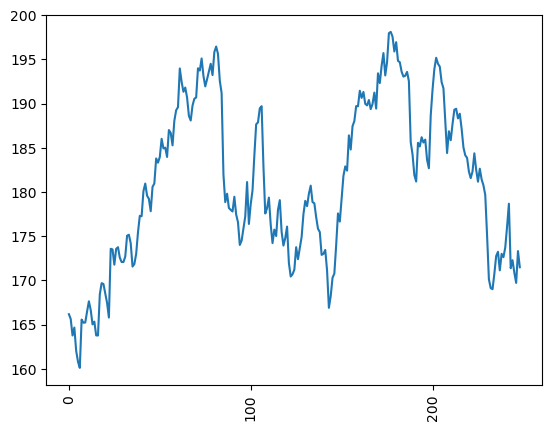

In [76]:

import matplotlib.pyplot as plt
plt.plot(merged_df_group.index, merged_df_group['Close'])
plt.xticks(range(0, len(list(merged_df_group.index)), 100), list(merged_df_group.index)[::100], rotation=90)
plt.show()

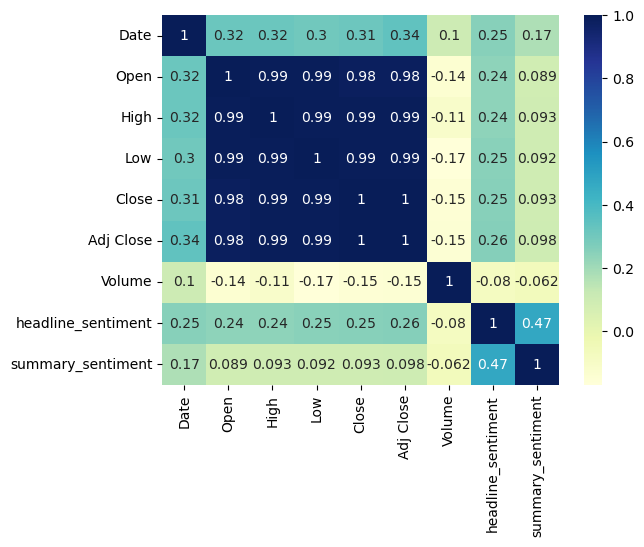

In [77]:
import seaborn as sns
#Correlation of output with numerical variables
numerical_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','headline_sentiment', 'summary_sentiment']

# plotting correlation heatmap
dataplot = sns.heatmap(merged_df_group[numerical_columns].corr(), cmap="YlGnBu", annot=True)

In [78]:
merged_df_group.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_sentiment', 'summary_sentiment'],
      dtype='object')

In [79]:
merged_df.drop(columns='Adj Close', inplace = True)

In [80]:
merged_df_group.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'headline_sentiment', 'summary_sentiment'],
      dtype='object')

In [81]:
#Scale Data
from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
y_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

dataset = min_max_scaler.fit_transform(merged_df_group[['Open', 'High', 'Low','Volume','headline_sentiment', 'summary_sentiment']])
y_scaled = y_scaler.fit_transform(merged_df_group[['Close']])
dataset = np.concatenate((dataset, y_scaled), axis=1)


In [82]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

174 75


In [83]:
def create_sequences(dataset, look_back=15):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 4]) # column with index 4 is close value which we want to predict
    return np.array(dataX), np.array(dataY)

In [84]:
x_train, y_train = create_sequences(train, look_back=15)
x_test, y_test = create_sequences(test, look_back=15)

In [85]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(158, 15, 7)
(158,)
(59, 15, 7)
(59,)


In [103]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense


model = Sequential()
model.add(LSTM(10, input_shape=(15, 7))) # hyperbolic tangent (tanh) activation function used by default
model.add(Dense(1)) # linear activation function is used by default
model.compile(loss='mean_squared_error', optimizer='adam')
#'adam' is a popular optimization algorithm that adapts the learning rates of each parameter individually, 
#making it well-suited for a wide range of tasks. Adam is an extension of stochastic gradient descent (SGD) 
#and is known for its efficiency in training deep neural networks.
model.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                      │ (None, 10)                    │         720 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 1)                     │          11 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 731 (2.86 KB)

 Trainable params: 731 (2.86 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# epochs represent how many times model traning happens through whole dataset
# batch_size represents number of examples considered in each iteration within epoch
# in this we will have 1220/10 : 122 iterations
model.fit(x_train, y_train, epochs=20, batch_size=10, verbose=2)

Epoch 1/20
16/16 - 3s - 170ms/step - loss: 0.0327
Epoch 2/20
16/16 - 0s - 9ms/step - loss: 0.0221
Epoch 3/20
16/16 - 0s - 10ms/step - loss: 0.0191
Epoch 4/20
16/16 - 0s - 9ms/step - loss: 0.0183
Epoch 5/20
16/16 - 0s - 9ms/step - loss: 0.0181
Epoch 6/20
16/16 - 0s - 10ms/step - loss: 0.0182
Epoch 7/20
16/16 - 0s - 9ms/step - loss: 0.0178
Epoch 8/20
16/16 - 0s - 9ms/step - loss: 0.0175
Epoch 9/20
16/16 - 0s - 8ms/step - loss: 0.0178
Epoch 10/20
16/16 - 0s - 9ms/step - loss: 0.0174
Epoch 11/20
16/16 - 0s - 9ms/step - loss: 0.0175
Epoch 12/20
16/16 - 0s - 9ms/step - loss: 0.0174
Epoch 13/20
16/16 - 0s - 10ms/step - loss: 0.0173
Epoch 14/20
16/16 - 0s - 9ms/step - loss: 0.0173
Epoch 15/20
16/16 - 0s - 9ms/step - loss: 0.0168
Epoch 16/20
16/16 - 0s - 10ms/step - loss: 0.0170
Epoch 17/20
16/16 - 0s - 9ms/step - loss: 0.0167
Epoch 18/20
16/16 - 0s - 9ms/step - loss: 0.0168
Epoch 19/20
16/16 - 0s - 9ms/step - loss: 0.0170
Epoch 20/20
16/16 - 0s - 10ms/step - loss: 0.0168


In [105]:
# Few examples of time series evaluation
def errors(prediction,actual): 
    mae = np.mean(np.abs(prediction - actual))
    mape = np.mean(np.abs(prediction - actual)/np.abs(actual))*100
    rmse = np.mean((prediction - actual)**2)**0.5
    return({'mae':mae,'mape':mape,'rmse':rmse})

In [106]:

from sklearn.metrics import mean_squared_error
from math import sqrt
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


# invert predictions and labels
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform([y_train])
testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform([y_test])

errors(trainPredict[:,0],trainY[0])

# calculate root mean squared error
#trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
#print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
#print('Test Score: %.2f RMSE' % (testScore))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


{'mae': 3.6768393579062257,
 'mape': 2.126775618906561,
 'rmse': 4.89189139815617}

In [107]:
look_back = 15
# shift train predictions for plotting
trainPredictPlot = np.empty_like(y_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
#plt.plot(min_max_scaler.inverse_transform(dataset))
plt.plot(df['close'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xticks(range(0, len(list(df.index)), 100), list(df.index)[::100], rotation=90)
plt.show()

KeyError: 'close'